In [5]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import eksplisitt  as eks
import ImageView as imv
import Grayscale as gray

In [6]:
def constrast(file, k):
    orig_im = imageio.imread(file).astype(float) / 255
    im = np.copy(orig_im)
    
    orig_gray_im = gray.rgb2gray(filepath)
    gray_im = gray.rgb2gray(filepath)
        
    im = eksplisittKontrast(im, orig_im, k)
    gray_im = eksplisittKontrast(gray_im, orig_gray_im, k)

    imv.view(orig_im, im, orig_gray_im, gray_im, "Kontrastforsterket") #Displayer bildene ved siden av hverandre

def eksplisittKontrast(im, orig_im, k):
    image = im
    for i in range(10):
        laplace = (image[0:-2, 1:-1] +
            image[2:, 1:-1] +
            image[1:-1, 0:-2] +
            image[1:-1, 2:] -
            4 * image[1:-1, 1:-1])
        h = k * (orig_im[0:-2, 1:-1] +
            orig_im[2:, 1:-1] +
            orig_im[1:-1, 0:-2] +
            orig_im[1:-1, 2:] -
            4 * orig_im[1:-1, 1:-1])
        image[1:-1, 1:-1] += .25 * (laplace - h)
        image[:, 0] = image[:, 1]      # Neumann randbetingelse
        image[:, -1] = image[:, -2]    #
        image[0, :] = image[1, :]      #
        image[-1, :] = image[-2 , :]   #
        image[image < 0] = 0                                 # klipp til lovlige verdier
        image[image > 1] = 1
    return image

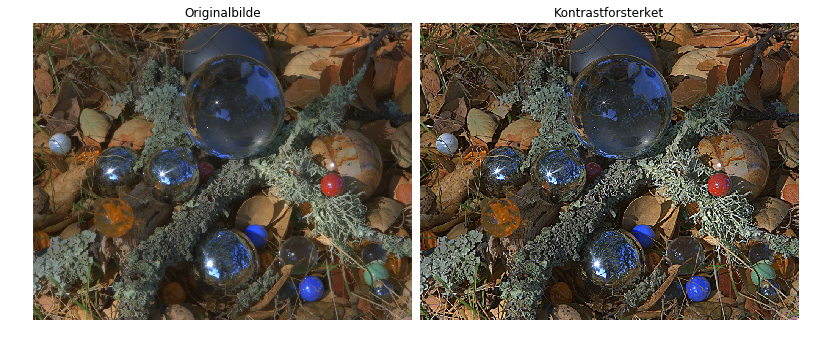

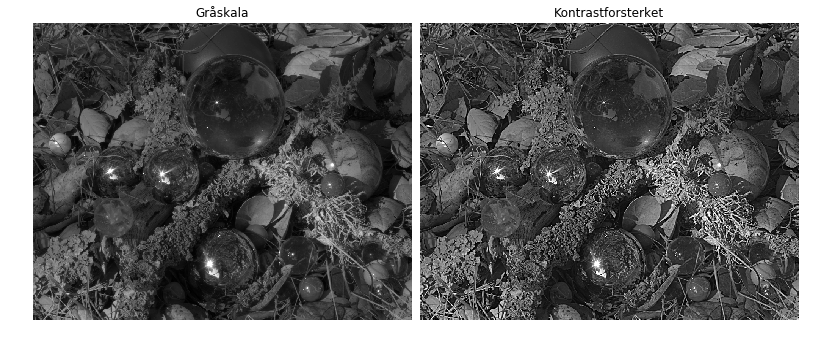

In [8]:
filepath = "../hdr-bilder/Balls/Balls_00032.png"
constant = 2.5

constrast(filepath, constant)